In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [136]:
from google.colab import files
files.upload()

Saving StudentsPerformance.csv to StudentsPerformance (2).csv


{'StudentsPerformance.csv': b"gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score\r\nfemale,group C,some high school,free/reduced,none,0,17,10\r\nfemale,group B,high school,free/reduced,none,8,24,23\r\nfemale,group B,some high school,free/reduced,none,18,32,28\r\nfemale,group B,some college,standard,none,11,38,32\r\nfemale,group C,some college,free/reduced,none,22,39,33\r\nfemale,group B,high school,free/reduced,completed,23,44,36\r\nfemale,group B,some high school,free/reduced,none,24,38,27\r\nfemale,group D,associate's degree,free/reduced,none,26,31,38\r\nfemale,group D,some high school,free/reduced,none,19,34,32\r\nfemale,group C,high school,standard,none,29,29,30\r\nfemale,group C,some high school,free/reduced,completed,29,40,44\r\nfemale,group D,bachelor's degree,free/reduced,none,29,41,47\r\nfemale,group B,some high school,standard,completed,32,51,44\r\nfemale,group C,some college,free/reduced,none,32,39,33\r\nfem

In [140]:
performance=pd.read_csv('StudentsPerformance.csv')

In [141]:
performance

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33
...,...,...,...,...,...,...,...,...
995,male,group E,some college,standard,completed,99,87,81
996,male,group A,some college,standard,completed,100,96,86
997,male,group D,some college,standard,completed,100,97,99
998,male,group E,associate's degree,free/reduced,completed,100,100,93


In [142]:
performance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


There 5 categorical columns and 3 numerical columns

The dataset has no null or duplicate values

Categorical columns are:
Gender, 
Race/ethnicity, 
Parental level of education, 
lunch

Numerical columns are:
Math score, 
Reading score, 
Writing score

The dataset contains the data of 1000 students. This analysis aims to understand the influence of parental level of education, the status of test preparation course etc. on the students performance in the exams.


**1. Find out how many males and females participated in the test.**

In [143]:
performance.value_counts('gender')

gender
female    518
male      482
dtype: int64

[Text(0, 0, '518'), Text(0, 0, '482')]

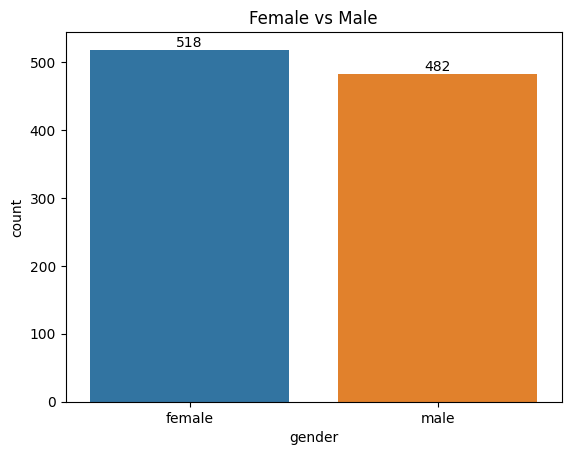

In [144]:
plt.title('Female vs Male')
plot = sns.countplot(x=performance['gender'],
                   order=performance['gender'].value_counts(ascending=False).index);

abs_values =performance['gender'].value_counts(ascending=False).values

plot.bar_label(container=plot.containers[0], labels=abs_values)

There are 518 female students and 482 male students participated in this test.

**2. What do you think about the students' parental level of education?**

In [145]:
performance.value_counts('parental level of education')

parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
dtype: int64

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'some college'),
  Text(1, 0, "associate's degree"),
  Text(2, 0, 'high school'),
  Text(3, 0, 'some high school'),
  Text(4, 0, "bachelor's degree"),
  Text(5, 0, "master's degree")])

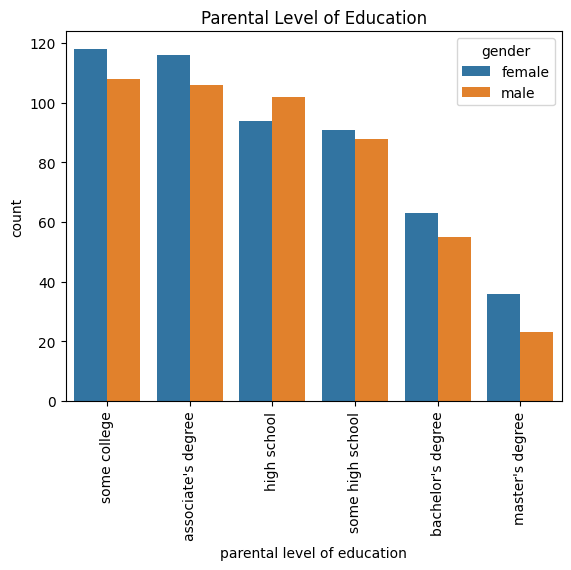

In [146]:
plt.title('Parental Level of Education')
plot = sns.countplot(x=performance['parental level of education'],hue = "gender", data= performance,
                   order=performance['parental level of education'].value_counts(ascending=False).index)
plt.xticks(rotation=90)

In [147]:
performance[['reading score', 'math score', 'writing score']].skew()

reading score   -0.288362
math score      -0.401174
writing score   -0.301511
dtype: float64

since the skewness value between -1/2 and +1/2 = approximately symmetric distribution so that lets take mean of the variables

In [148]:
analyse = performance.groupby(['parental level of education'])[['gender','reading score', 'math score', 'writing score']].mean()

<ipython-input-148-09a86fd6d3ce>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  analyse = performance.groupby(['parental level of education'])[['gender','reading score', 'math score', 'writing score']].mean()


In [149]:
analyse

,reading score,math score,writing score
parental level of education,,,
associate's degree,71.018018,67.977477,70.031532
bachelor's degree,73.000000,69.288136,73.381356
high school,64.602041,61.821429,62.403061
master's degree,75.949153,70.254237,75.677966
some college,69.566372,67.128319,69.035398
some high school,66.759777,63.134078,64.888268


<Axes: xlabel='parental level of education'>

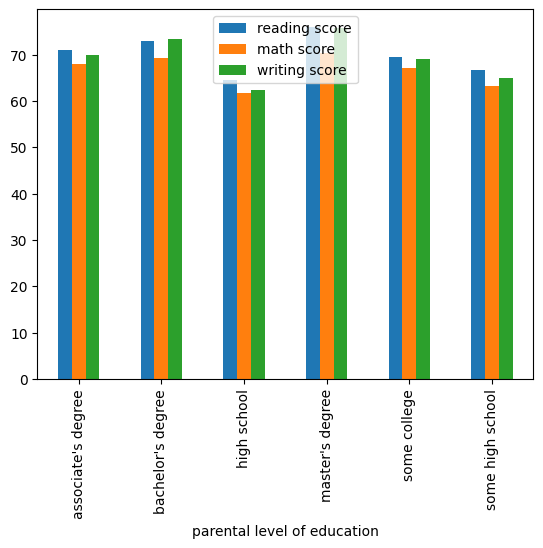

In [150]:
analyse.plot.bar()

From the above plots and analysis it is clear that even though there is least group of parents are with masters degree but students of those parents score well in maths reading and writing tests. And those who scores less have parents with high school education only.

**3. Who scores the most on average for math, reading and writing based on**

**● Gender**

**● Test preparation cours**

In [151]:
gend_score=performance.groupby('gender')['math score','reading score','writing score'].mean()

<ipython-input-151-6d4621b00fdd>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  gend_score=performance.groupby('gender')['math score','reading score','writing score'].mean()


In [152]:
gend_score

,math score,reading score,writing score
gender,,,
female,63.376448,72.590734,72.467181
male,68.821577,65.545643,63.446058


<Axes: xlabel='gender'>

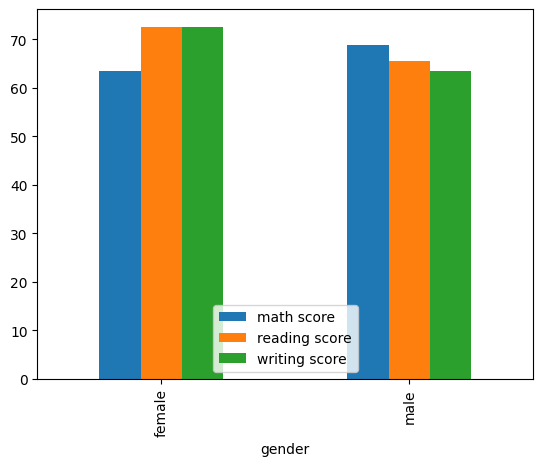

In [153]:
gend_score.plot.bar()

Among the given set of students female students have higher average reading and writing scores than their male counterparts. Where male students have higher average math scores

In [157]:
perform_score=performance.groupby('test preparation course')['math score','reading score','writing score'].mean()

<ipython-input-157-b26e71374e11>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  perform_score=performance.groupby('test preparation course')['math score','reading score','writing score'].mean()


In [158]:
perform_score

,math score,reading score,writing score
test preparation course,,,
completed,69.96648,74.175978,74.684358
none,63.78972,66.417445,64.457944


<Axes: xlabel='test preparation course'>

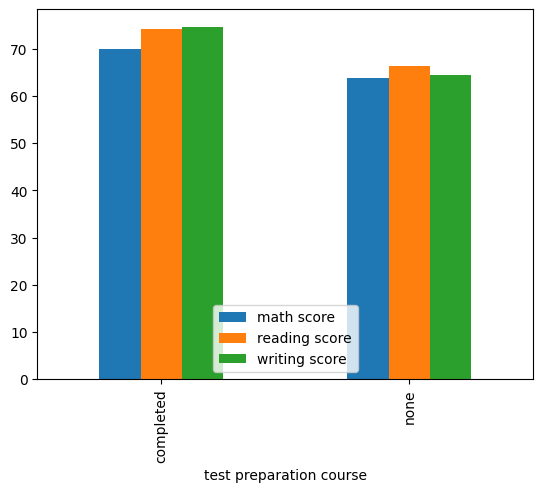

In [159]:
perform_score.plot.bar()

Students who have completed the test preparation course have higher average scores in both maths reading and writing

**4. What do you think about the scoring variation for math, reading and writing
based on**

**● Gender**

**● Test preparation cours**

In [160]:
gend_score_var=performance.groupby('gender')['math score','reading score','writing score'].var()

<ipython-input-160-dc8800d73d26>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  gend_score_var=performance.groupby('gender')['math score','reading score','writing score'].var()


In [161]:
gend_score_var

,math score,reading score,writing score
gender,,,
female,256.958593,207.677438,220.369327
male,211.889097,200.211010,202.413924


<Axes: xlabel='gender'>

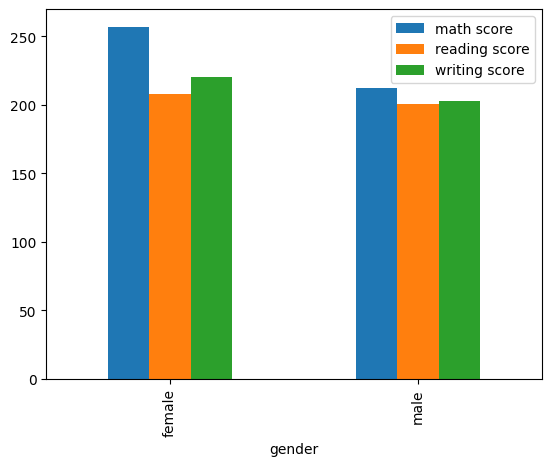

In [162]:
gend_score_var.plot.bar()

Among the given set of students female students have higher variation in math score than their male counterparts. Where male students have less variation in reading and writing scores

In [164]:
prep_score_var=performance.groupby('test preparation course')['math score','reading score','writing score'].var()

<ipython-input-164-4574ed78128a>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  prep_score_var=performance.groupby('test preparation course')['math score','reading score','writing score'].var()


In [165]:
prep_score_var

,math score,reading score,writing score
test preparation course,,,
completed,210.884027,183.265864,175.202612
none,246.668662,213.419851,226.251739


<Axes: xlabel='test preparation course'>

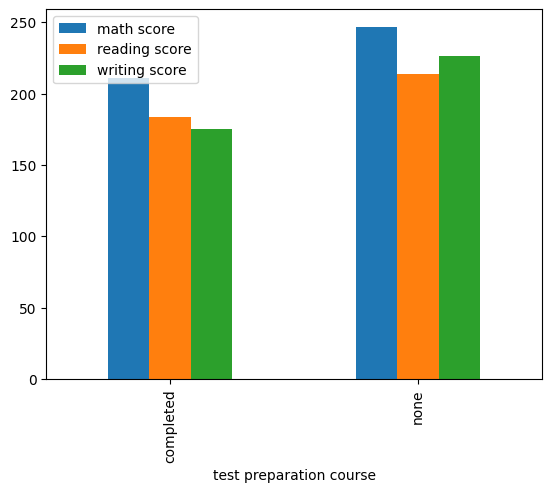

In [167]:
prep_score_var.plot.bar()

Students who have completed the test preparation course have less variation in both maths reading and writing scores

**5. The management needs your help to give bonus points to the top 25% of
students based on their math score, so how will you help the management
to achieve this.**

In [168]:
performance['math score'].quantile(0.75)

77.0

In [169]:
top25=performance[performance['math score']>=77].sort_values('math score',ascending=False)

In [170]:
top25

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
999,male,group E,bachelor's degree,standard,completed,100,100,100
998,male,group E,associate's degree,free/reduced,completed,100,100,93
997,male,group D,some college,standard,completed,100,97,99
996,male,group A,some college,standard,completed,100,96,86
517,female,group E,associate's degree,standard,none,100,100,100
...,...,...,...,...,...,...,...,...
854,male,group D,some high school,standard,completed,77,68,69
855,male,group E,associate's degree,free/reduced,completed,77,69,68
856,male,group E,some high school,standard,completed,77,76,77
415,female,group B,master's degree,free/reduced,completed,77,97,94


**top25** is the list which shows the information regarding 25%of students who scores top score in maths, so that the management can give bonus points to the listed students.